# Share the Insight

There are two main insights we want to communicate. 
- Bangalore is the largest market for Onion Arrivals. 
- Onion Price variation has increased in the recent years.

Let us explore how we can communicate these insight visually.

## Preprocessing to get the data

In [1]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [4]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [5]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [6]:
# Get the data for year 2015
df2015 = df[df.year == 2015]

In [7]:
# Groupby on City to get the sum of quantity
df2015City = df2015.groupby(['city'], as_index=False)['quantity'].sum()

In [8]:
df2015City = df2015City.sort_values(by = "quantity", ascending = False)

In [9]:
df2015City.head()

,city,quantity
9,BANGALORE,8267060
66,MAHUVA,5113510
100,SOLAPUR,4162041
83,PUNE,3591209
62,LASALGAON,3581359


## Let us plot the Cities in a Geographic Map

In [10]:
# Load the geocode file
dfGeo = pd.read_csv('city_geocode.csv')

In [11]:
dfGeo.head()

,city,lon,lat
0,GUWAHATI,91.736237,26.144517
1,KOLKATA,88.363895,22.572646
2,SRIRAMPUR,88.338505,23.403339
3,SHEROAPHULY,88.321501,22.769003
4,BURDWAN,87.861479,23.232421


### PRINCIPLE: Joining two data frames

There will be many cases in which your data is in two different dataframe and you would like to merge them in to one dataframe. Let us look at one example of this - which is called left join

![]('../img/left_merge.png')


In [12]:
dfCityGeo = pd.merge(df2015City, dfGeo, how='left', on=['city', 'city'])

In [13]:
dfCityGeo.head()

,city,quantity,lon,lat
0,BANGALORE,8267060,77.594563,12.971599
1,MAHUVA,5113510,71.756317,21.090219
2,SOLAPUR,4162041,75.906391,17.659919
3,PUNE,3591209,73.856744,18.520430
4,LASALGAON,3581359,74.232606,20.149142


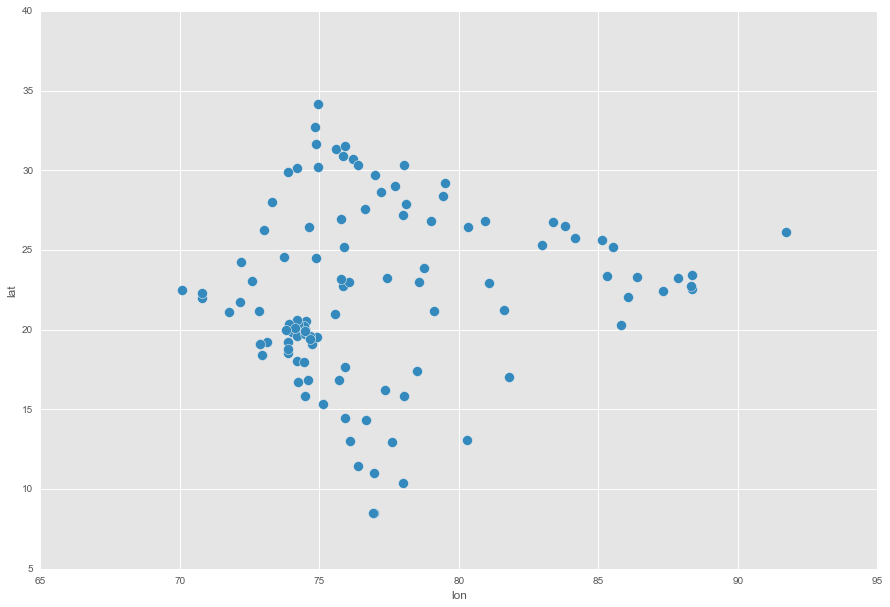

In [14]:
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = 100)

We can do a crude aspect ratio adjustment to make the cartesian coordinate systesm appear like a mercator map

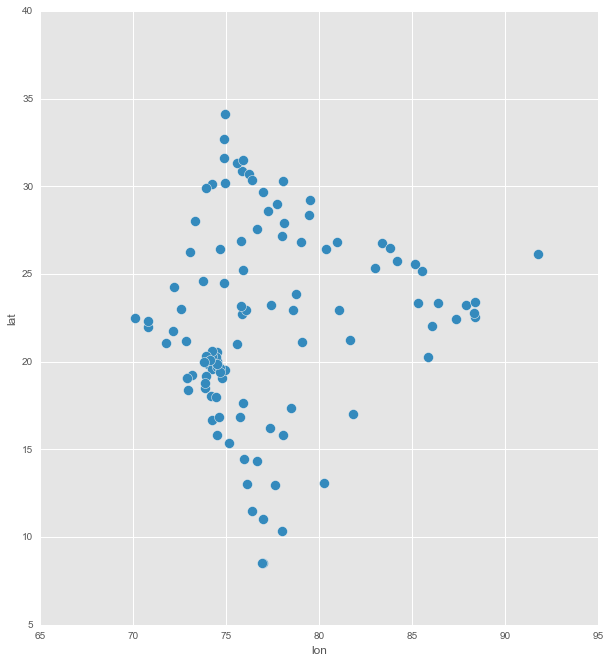

In [15]:
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = 100, figsize = [10,11])

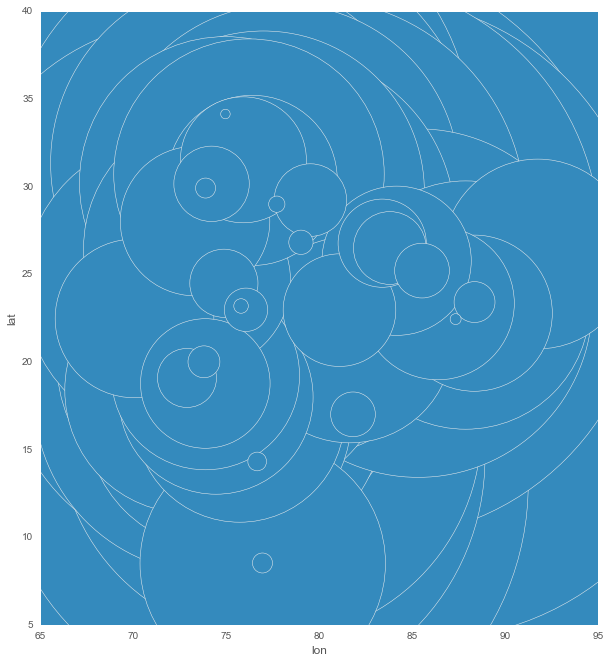

In [19]:
# Let us at quanitity as the size of the bubble
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity, figsize = [10,11])

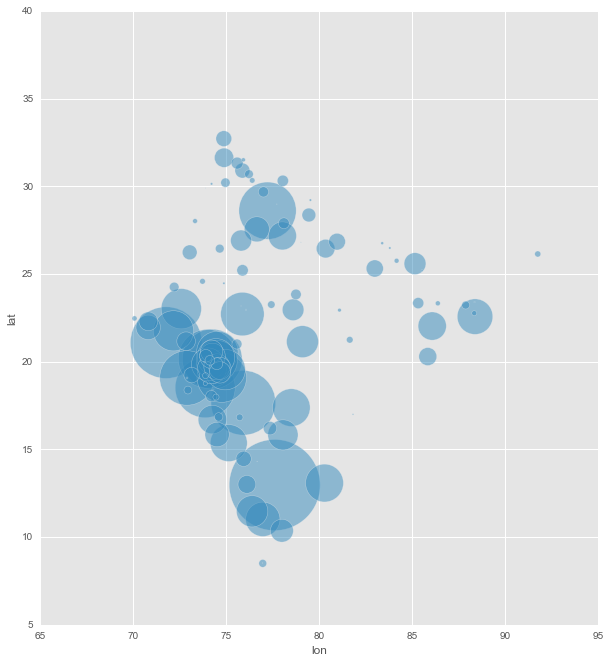

In [21]:
# Let us scale down the quantity variable
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity/1000, alpha = 0.5, figsize = [10,11])

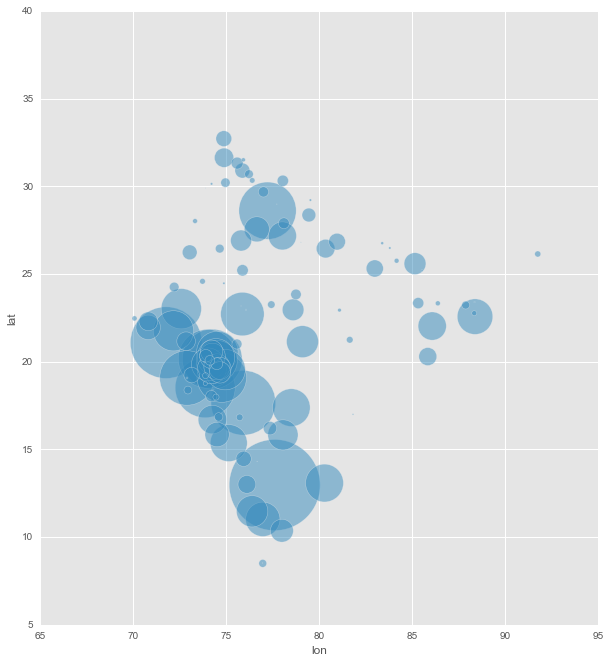

In [22]:
# Reduce the opacity of the color, so that we can see overlapping values
dfCityGeo.plot(kind = 'scatter', x = 'lon', y = 'lat', s = dfCityGeo.quantity/1000, alpha = 0.5, figsize = [10,11])

### Exercise 1 - Can you plot all the States by quantity in (pseudo) geographic map

## Share the insight of monthly price variation in Bangalore? 

In [27]:
# Get the data for only Bangalore
dfBang = df[df.city == 'BANGALORE']

In [31]:
# Sort by Date
dfBang = dfBang.sort_values(by = "date")

In [32]:
# Set the Index for the Dataframe
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [33]:
# Calcualte the Price Difference
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

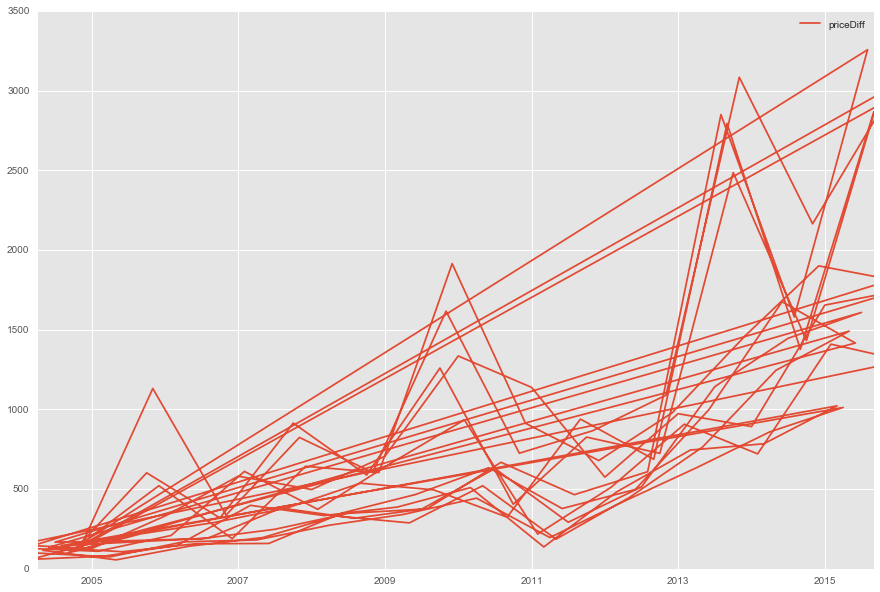

In [34]:
dfBang.plot(kind = 'line', y = 'priceDiff')